<a href="https://colab.research.google.com/github/Rstam59/TaskDataRepoForStudents/blob/main/05_transfer_learnin_in_tensorflow_part_2_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Wed Sep 18 12:04:35 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!wget https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/helper_functions.py

--2024-09-18 12:04:42--  https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10247 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-09-18 12:04:42 (76.6 MB/s) - ‘helper_functions.py’ saved [10247/10247]



In [3]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [4]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2024-09-18 12:04:53--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.139.207, 142.251.107.207, 74.125.196.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.139.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   168MB/s    in 1.0s    

2024-09-18 12:04:54 (168 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [5]:
import zipfile

def unzip_data(filename):
  zip_ref = zipfile.ZipFile(filename, 'r')
  zip_ref.extractall(),
  zip_ref.close()

In [6]:
unzip_data('10_food_classes_10_percent.zip')

In [7]:
import os

def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dir_path}.")

In [8]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in 10_food_classes_10_percent.
There are 10 directories and 0 images in 10_food_classes_10_percent.
There are 0 directories and 75 images in 10_food_classes_10_percent.
There are 0 directories and 75 images in 10_food_classes_10_percent.
There are 0 directories and 75 images in 10_food_classes_10_percent.
There are 0 directories and 75 images in 10_food_classes_10_percent.
There are 0 directories and 75 images in 10_food_classes_10_percent.
There are 0 directories and 75 images in 10_food_classes_10_percent.
There are 0 directories and 75 images in 10_food_classes_10_percent.
There are 0 directories and 75 images in 10_food_classes_10_percent.
There are 0 directories and 75 images in 10_food_classes_10_percent.
There are 0 directories and 75 images in 10_food_classes_10_percent.
There are 10 directories and 0 images in 10_food_classes_10_percent.
There are 0 directories and 250 images in 10_food_classes_10_percent.
There are 0 directories and 250 im

In [9]:
train_dir = '/content/10_food_classes_10_percent/train'
test_dir = '/content/10_food_classes_10_percent/test'

In [10]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data_10_percent = tf.keras.utils.image_dataset_from_directory(directory = train_dir,
                                                                    image_size = IMG_SIZE,
                                                                    label_mode = 'categorical',
                                                                    batch_size = BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                image_size = IMG_SIZE,
                                                                label_mode = 'categorical',
                                                                batch_size = BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [11]:
train_data_10_percent

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [12]:
for i in train_data_10_percent.take(1):
    print(i[0].shape)

(32, 224, 224, 3)


In [13]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [14]:
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[9.57142830e+00 1.09285717e+01 1.18571434e+01]
   [1.68826542e+01 1.69540825e+01 2.65969410e+01]
   [1.75714302e+01 1.60000000e+01 3.80765305e+01]
   ...
   [1.40392807e+02 1.43392807e+02 1.50392807e+02]
   [1.10321579e+02 1.11393021e+02 1.15035812e+02]
   [1.42178665e+02 1.42178665e+02 1.41464310e+02]]

  [[1.09285717e+01 1.09285717e+01 1.22142859e+01]
   [1.60000000e+01 1.50000000e+01 2.27857151e+01]
   [1.63010216e+01 1.52857141e+01 3.00153046e+01]
   ...
   [1.19157829e+02 1.22157829e+02 1.27698601e+02]
   [1.10408272e+02 1.11413376e+02 1.15255180e+02]
   [1.30632767e+02 1.30632767e+02 1.29918411e+02]]

  [[1.09336739e+01 8.29081631e+00 1.15051022e+01]
   [1.31428576e+01 1.05000000e+01 1.52857141e+01]
   [1.35255098e+01 1.13571424e+01 1.61734695e+01]
   ...
   [1.23055603e+02 1.26055603e+02 1.31484131e+02]
   [9.54540863e+01 9.64540863e+01 1.00311203e+02]
   [9.72042084e+01 9.72042084e+01 9.72042084e+01]]

  ...

  [[2.32306717e+02 2.31235703e+02 2.41092758e+02]
   [2

In [15]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape = (224, 224, 3), name = 'input_layer')

#x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

x = base_model(inputs)
print(f"shape after passing inputs through base model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name = 'Global_average_pooling_layer')(x)
print(f"Shape after GlobalAveragePooling2D {x.shape}")

outputs = tf.keras.layers.Dense(10, activation = 'softmax', name = 'output_layer')(x)

model_0 = tf.keras.Model(inputs, outputs)


model_0.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history_10_percent = model_0.fit(train_data_10_percent,
            batch_size = BATCH_SIZE,
            epochs = 5,
            validation_data = test_data)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D (None, 1280)
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.2192 - loss: 2.1868 - val_accuracy: 0.6520 - val_loss: 1.4194
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 302ms/step - accuracy: 0.7054 - loss: 1.3085 - val_accuracy: 0.7760 - val_loss: 0.9804
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 247ms/step - accuracy: 0.7709 - loss: 0.9487 - val_accuracy: 0.8084 - val_loss: 0.7991
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 503ms/step - accuracy: 0.8050 - loss: 0.7591 - val_accuracy: 0.8180 - val_loss: 0.7108
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 280ms/step - accuracy: 0.8488 - loss: 0.6383 - val_accuracy: 0.8232 - val_loss: 0.6520


In [16]:
model_0.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.8314 - loss: 0.6358


[0.6519625782966614, 0.823199987411499]

In [17]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_layer
1 rescaling
2 normalization
3 rescaling_1
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activati

In [18]:
base_model.summary()

Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None, None, 3)  │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, None, None, 3)  │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, None, None, 3)  │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, None, None, 3)  │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, None, None, 3)  │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, None, None, 32) │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, None, None, 32) │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, None, None, 32) │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, None, None, 32) │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, None, None, 32) │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, None, None, 32) │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,049,571 (15.45 MB)

In [19]:
model_0.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Global_average_pooling_layer         │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │          12,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,088,003 (15.59 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 25,622 (100.09 KB)

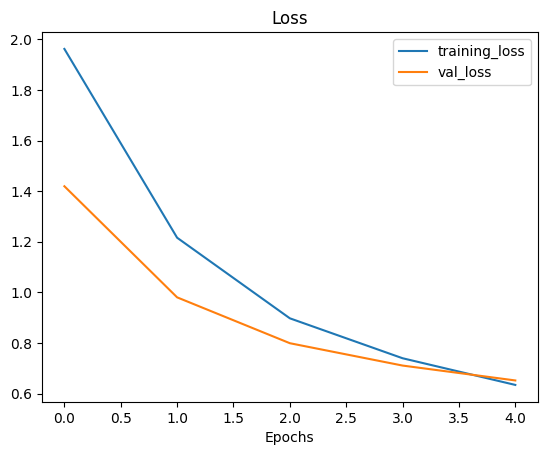

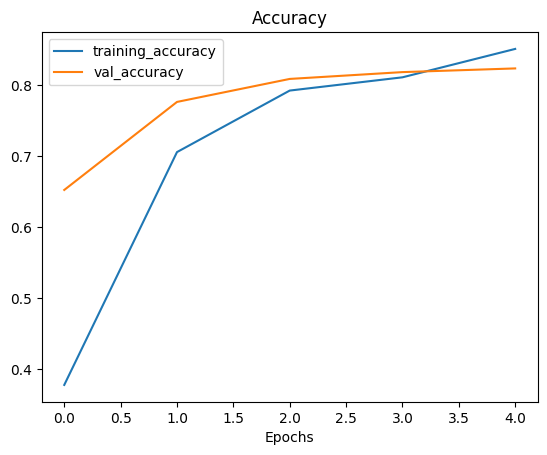

In [20]:
plot_loss_curves(history_10_percent)

In [21]:
input_shape = (1, 4, 4, 3)
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor: \n {input_tensor} \n")

global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D Global average pooled random tensor: \n {global_average_pooled_tensor} \n")

Random input tensor: 
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338894  0.97772694]
   [ 0.24694404  0.20573746 -0.52562326]
   [ 0.32410017  0.02545409 -0.10638496]
   [-0.63694745  1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815628  0.23479679 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]] 

2D Global average pooled random tensor: 
 [[-0.09368646 -0.45840448 -0.2885598 ]] 



In [22]:
tf.reduce_mean(input_tensor, axis = [1, 2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

In [23]:
#Same thing as above but this time use globalmaxpool2d

In [24]:
tf.keras.layers.GlobalMaxPool2D()(input_tensor)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.9058464, 1.1603122, 1.6994323]], dtype=float32)>

In [25]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2024-09-18 12:07:02--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.11.207, 108.177.12.207, 74.125.26.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.11.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   235MB/s    in 0.5s    

2024-09-18 12:07:03 (235 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [26]:
unzip_data("10_food_classes_1_percent.zip")

In [27]:
train_dir_1_percent = "/content/10_food_classes_1_percent/train"
test_dir = "/content/10_food_classes_1_percent/test"

In [28]:
walk_through_dir("/content/10_food_classes_1_percent")

There are 2 directories and 0 images in /content/10_food_classes_1_percent.
There are 10 directories and 0 images in /content/10_food_classes_1_percent.
There are 0 directories and 7 images in /content/10_food_classes_1_percent.
There are 0 directories and 7 images in /content/10_food_classes_1_percent.
There are 0 directories and 7 images in /content/10_food_classes_1_percent.
There are 0 directories and 7 images in /content/10_food_classes_1_percent.
There are 0 directories and 7 images in /content/10_food_classes_1_percent.
There are 0 directories and 7 images in /content/10_food_classes_1_percent.
There are 0 directories and 7 images in /content/10_food_classes_1_percent.
There are 0 directories and 7 images in /content/10_food_classes_1_percent.
There are 0 directories and 7 images in /content/10_food_classes_1_percent.
There are 0 directories and 7 images in /content/10_food_classes_1_percent.
There are 10 directories and 0 images in /content/10_food_classes_1_percent.
There are 

In [29]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode = 'categorical',
                                                                           image_size = IMG_SIZE,
                                                                           batch_size = BATCH_SIZE)


test_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                          label_mode = 'categorical',
                                                                          image_size = IMG_SIZE,
                                                                          batch_size = BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


data_augmentation = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (224, 224, 3)),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
], name = "data_augmentation")

/content/10_food_classes_1_percent/train/pizza/3478964.jpg


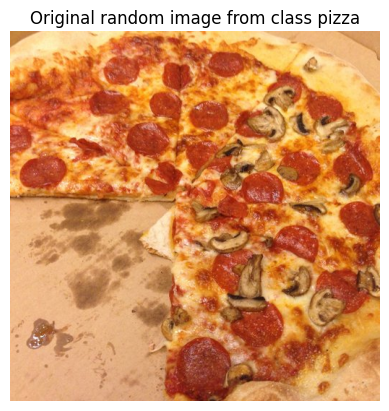

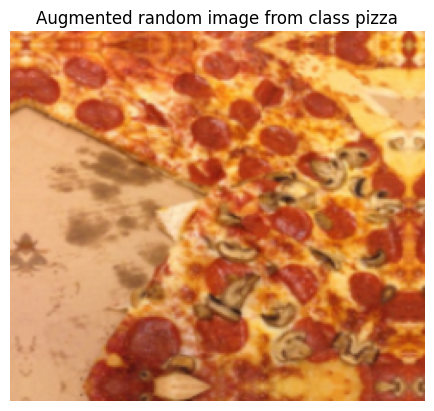

In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_1_percent.class_names)
target_dir = "/content/10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image
print(random_image_path)

img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.axis(False)
plt.title(f"Original random image from class {target_class}")

img = tf.image.resize(img, size = (224, 224))
augmented_img = tf.squeeze(data_augmentation(tf.expand_dims(img, axis = 0)))
plt.figure()
plt.title(f"Augmented random image from class {target_class}")
plt.axis(False)
plt.imshow(augmented_img/255.)

In [32]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape = input_shape, name = "input_layer")

x = data_augmentation(inputs)

x = base_model(x, training = False)

x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)

outputs = tf.keras.layers.Dense(10, activation = 'softmax', name = 'output_layer')(x)

model_1 = tf.keras.Model(inputs, outputs)

model_1.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

history_1_percent = model_1.fit(train_data_1_percent,
                                epochs = 5,
                                validation_data = test_data)

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 25s 6s/step - accuracy: 0.0709 - loss: 2.4568 - val_accuracy: 0.1580 - val_loss: 2.2455
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.1496 - loss: 2.2007 - val_accuracy: 0.2440 - val_loss: 2.1308
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.3914 - loss: 2.0566 - val_accuracy: 0.3244 - val_loss: 2.0387
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 5s/step - accuracy: 0.4135 - loss: 1.9282 - val_accuracy: 0.3752 - val_loss: 1.9597
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.5780 - loss: 1.7345 - val_accuracy: 0.4244 - val_loss: 1.8852


In [33]:
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.4263 - loss: 1.8764


[1.8851640224456787, 0.4244000017642975]

In [34]:
model_1.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ data_augmentation (Sequential)       │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, None, None, 1280)    │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling_layer         │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │          12,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,088,003 (15.59 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 25,622 (100.09 KB)

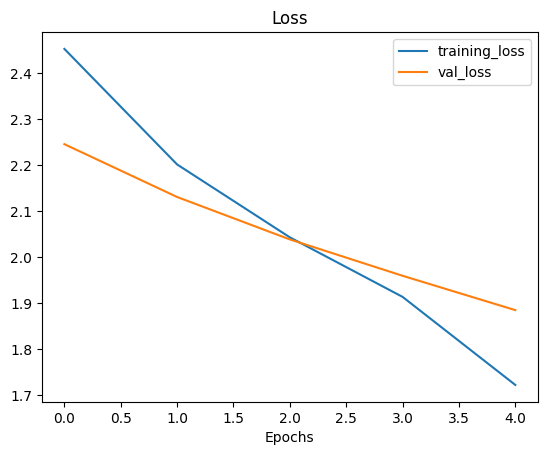

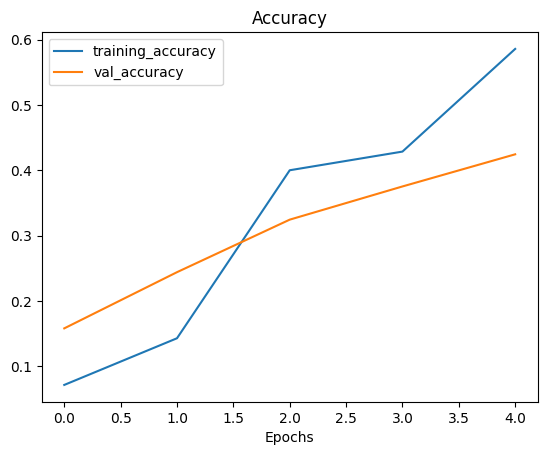

In [35]:
plot_loss_curves(history_1_percent)

In [36]:
train_dir_10_percent = "/content/10_food_classes_10_percent/train"
test_dir = "/content/10_food_classes_10_percent/test"

In [37]:
import tensorflow as tf
IMG_SIZE = (224, 224)

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            image_size = IMG_SIZE,
                                                                            label_mode = 'categorical')

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size = IMG_SIZE,
                                                                label_mode = 'categorical')


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [39]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

data_augmentation = Sequential([
  layers.Input(shape = input_shape),
  layers.RandomFlip('horizontal'),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
  layers.RandomZoom(0.2),
  layers.RandomRotation(0.2)
  #layers.Rescaling(1./255)
], name = 'data_augmentation')

data_augmentation.summary()

Model: "data_augmentation"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ random_flip_1 (RandomFlip)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_height_1 (RandomHeight)       │ (None, None, 224, 3)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_width_1 (RandomWidth)         │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom_1 (RandomZoom)           │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation_1 (RandomRotation)   │ (None, None, None, 3)       │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
input_shape

(224, 224, 3)

In [49]:
checkpoint_path = "10_percent_model_checkpoints_weights/checkpoint.weights.h5"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath= checkpoint_path,
                                                         save_weights_only = True,
                                                         save_best_only = True,
                                                         save_freq = 'epoch',
                                                         verbose = 1)

In [50]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape = input_shape, name = "input_layer")

x = data_augmentation(inputs)
x = base_model(x, training = False)
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_2D")(x)

outputs = tf.keras.layers.Dense(10, activation = 'softmax', name = "output_layer")(x)
model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)


initial_epochs = 5

history_10_percent_data_aug = model_2.fit(train_data_10_percent,
            epochs = initial_epochs,
            validation_data = test_data,
            callbacks = [checkpoint_callback])

Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.1941 - loss: 2.2573
Epoch 1: val_loss improved from inf to 1.60773, saving model to 10_percent_model_checkpoints_weights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 24s 529ms/step - accuracy: 0.1980 - loss: 2.2511 - val_accuracy: 0.5520 - val_loss: 1.6077
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.5959 - loss: 1.5425
Epoch 2: val_loss improved from 1.60773 to 1.16865, saving model to 10_percent_model_checkpoints_weights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 23s 627ms/step - accuracy: 0.5964 - loss: 1.5404 - val_accuracy: 0.7132 - val_loss: 1.1687
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.6617 - loss: 1.2488
Epoch 3: val_loss improved from 1.16865 to 0.96343, saving model to 10_percent_model_checkpoints_weights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 416ms/step - accuracy: 0.6623 - loss: 1.2474 - val_accuracy: 0.7568 - val_loss: 0.9634
Epoch 4/5
24/2

In [42]:
results_10_percent_aug = model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.7949 - loss: 0.7624


In [43]:
model_2.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ data_augmentation (Sequential)       │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, None, None, 1280)    │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling_2D            │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │          12,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,088,003 (15.59 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 25,622 (100.09 KB)

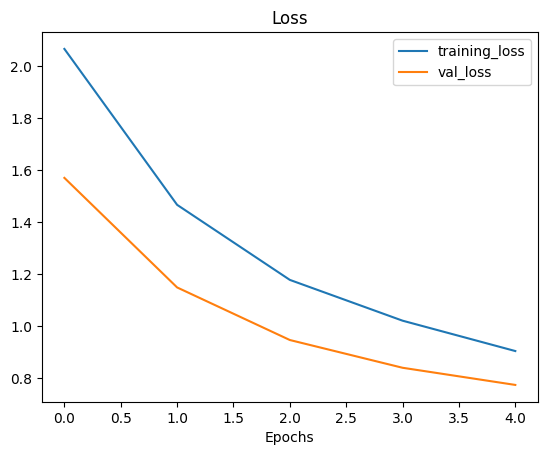

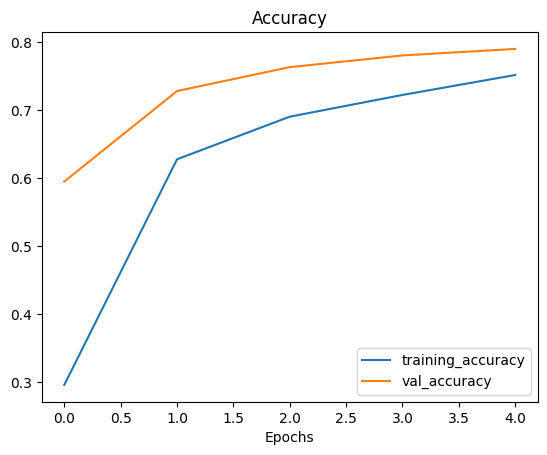

In [44]:
plot_loss_curves(history_10_percent_data_aug)

In [51]:
model_2.load_weights(checkpoint_path)

In [52]:
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.7911 - loss: 0.7692


In [53]:
import numpy as np
np.isclose(loaded_weights_model_results, results_10_percent_aug)


array([False, False])

In [ ]:
for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x7eab4fae44f0> True
<keras.src.engine.sequential.Sequential object at 0x7eaaf422acb0> True
<keras.src.engine.functional.Functional object at 0x7eab3ce1fa30> False
<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7eab3d094460> True
<keras.src.layers.core.dense.Dense object at 0x7eab3ce1c2e0> True


In [ ]:
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_7 False
1 rescaling_6 False
2 normalization_3 False
3 rescaling_7 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [ ]:
print(len(model_2.layers[2].trainable_variables))

0


In [54]:
base_model.trainable = False
for layer in base_model.layers[-10:]:
  layer.trainable = True


model_2.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics = ['accuracy']
)

In [55]:
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer_7 False
1 rescaling_10 False
2 normalization_5 False
3 rescaling_11 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_sque

In [56]:
model_2.trainable_variables

[<KerasVariable shape=(1, 1, 1152, 48), dtype=float32, path=block7a_se_reduce/kernel>,
 <KerasVariable shape=(48,), dtype=float32, path=block7a_se_reduce/bias>,
 <KerasVariable shape=(1, 1, 48, 1152), dtype=float32, path=block7a_se_expand/kernel>,
 <KerasVariable shape=(1152,), dtype=float32, path=block7a_se_expand/bias>,
 <KerasVariable shape=(1, 1, 1152, 320), dtype=float32, path=block7a_project_conv/kernel>,
 <KerasVariable shape=(320,), dtype=float32, path=block7a_project_bn/gamma>,
 <KerasVariable shape=(320,), dtype=float32, path=block7a_project_bn/beta>,
 <KerasVariable shape=(1, 1, 320, 1280), dtype=float32, path=top_conv/kernel>,
 <KerasVariable shape=(1280,), dtype=float32, path=top_bn/gamma>,
 <KerasVariable shape=(1280,), dtype=float32, path=top_bn/beta>,
 <KerasVariable shape=(1280, 10), dtype=float32, path=output_layer/kernel>,
 <KerasVariable shape=(10,), dtype=float32, path=output_layer/bias>]

In [ ]:
print(len(model_2.trainable_variables))

12


In [59]:
initial_epochs = 5

In [58]:
fine_tune_epochs = initial_epochs + 5

history_fine_10_percent_aug = model_2.fit(train_data_10_percent,
                                          epochs = fine_tune_epochs,
                                          validation_data = test_data,
                                          initial_epoch = history_10_percent_data_aug.epoch[-1])


Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 23s 484ms/step - accuracy: 0.7741 - loss: 0.9212 - val_accuracy: 0.7840 - val_loss: 0.7159
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 417ms/step - accuracy: 0.8037 - loss: 0.7737 - val_accuracy: 0.8136 - val_loss: 0.6209
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 390ms/step - accuracy: 0.8169 - loss: 0.6896 - val_accuracy: 0.8296 - val_loss: 0.5656
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 362ms/step - accuracy: 0.8345 - loss: 0.6465 - val_accuracy: 0.8464 - val_loss: 0.5179
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 410ms/step - accuracy: 0.8789 - loss: 0.5207 - val_accuracy: 0.8520 - val_loss: 0.4912
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 572ms/step - accuracy: 0.8542 - loss: 0.5339 - val_accuracy: 0.8540 - val_loss: 0.4708


In [60]:
results_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.8583 - loss: 0.4526


In [ ]:
results_10_percent_aug

[0.6152400374412537, 0.843999981880188]

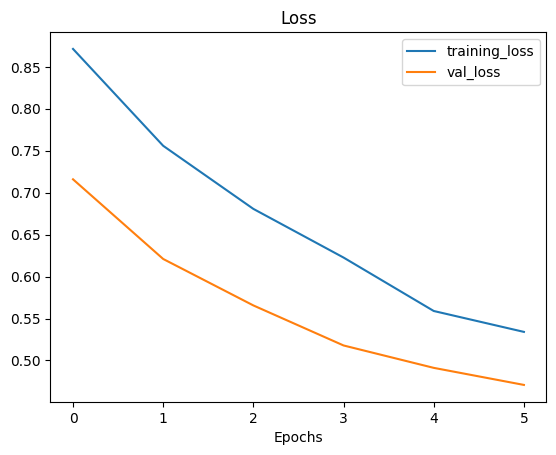

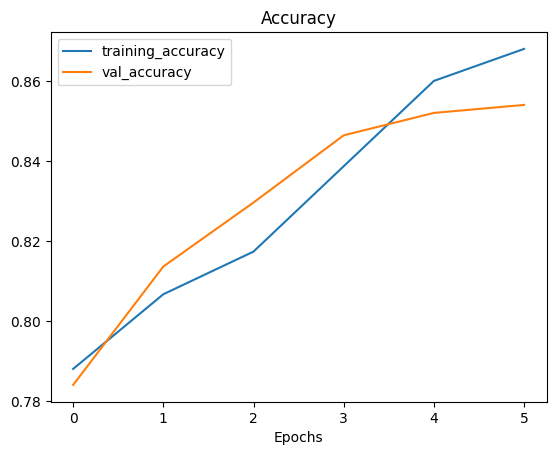

In [61]:
plot_loss_curves(history_fine_10_percent_aug)

In [62]:
def compare_histories(original_history, new_history, initial_epochs = 5):
  acc = original_history.history['accuracy']
  loss = original_history.history['loss']

  val_acc = original_history.history['val_accuracy']
  val_loss = original_history.history['val_loss']

  total_acc = acc + new_history.history['accuracy']
  total_loss = loss + new_history.history['loss']

  total_val_acc = val_acc + new_history.history['val_accuracy']
  total_val_loss = val_loss + new_history.history['val_loss']

  plt.figure(figsize = (8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(total_acc, label = 'training accuracy')
  plt.plot(total_val_acc, label = 'Val accuracy')
  plt.plot([initial_epochs - 1, initial_epochs - 1], plt.ylim(), label = "Start fine tuning")
  plt.legend(loc = 'lower right')
  plt.title('Trainig and Val accuracy')


  plt.figure(figsize = (8, 8))
  plt.subplot(2, 1, 2)
  plt.plot(total_loss, label = "Training Loss")
  plt.plot(total_val_loss, label = "Val Loss")
  plt.plot([initial_epochs - 1, initial_epochs - 1], plt.ylim(), label = 'Start Fine Tuning')
  plt.legend(loc = 'upper right')
  plt.title("Training and Val loss")

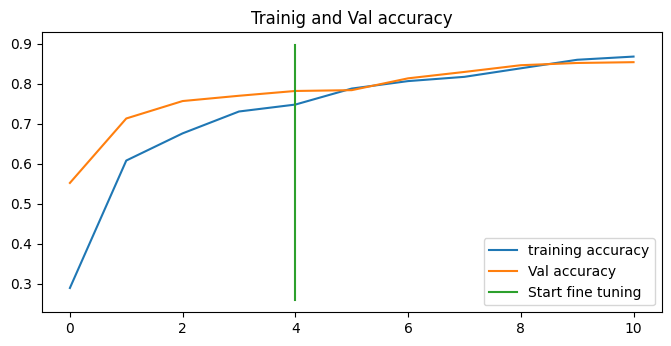

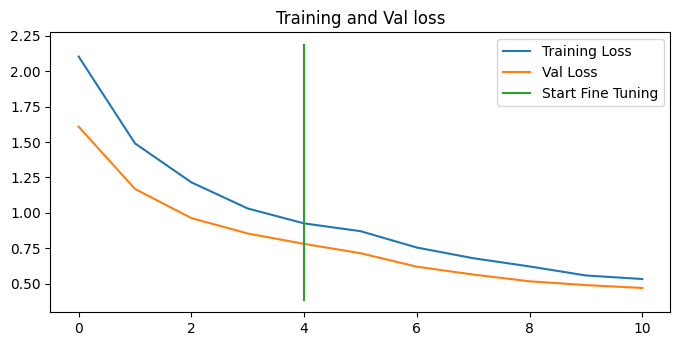

In [63]:
compare_histories(history_10_percent_data_aug, history_fine_10_percent_aug)

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2024-07-29 15:26:50--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.157.207, 142.251.8.207, 142.251.170.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.157.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  29.0MB/s    in 18s     

2024-07-29 15:27:09 (27.3 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
unzip_data("10_food_classes_all_data.zip")


In [ ]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in 10_food_classes_all_data.
There are 10 directories and 0 images in 10_food_classes_all_data.
There are 0 directories and 250 images in 10_food_classes_all_data.
There are 0 directories and 250 images in 10_food_classes_all_data.
There are 0 directories and 250 images in 10_food_classes_all_data.
There are 0 directories and 250 images in 10_food_classes_all_data.
There are 0 directories and 250 images in 10_food_classes_all_data.
There are 0 directories and 250 images in 10_food_classes_all_data.
There are 0 directories and 250 images in 10_food_classes_all_data.
There are 0 directories and 250 images in 10_food_classes_all_data.
There are 0 directories and 250 images in 10_food_classes_all_data.
There are 0 directories and 250 images in 10_food_classes_all_data.
There are 10 directories and 0 images in 10_food_classes_all_data.
There are 0 directories and 750 images in 10_food_classes_all_data.
There are 0 directories and 750 images in 10_food_cl

In [ ]:
train_dir_all_data = "/content/10_food_classes_all_data/train"
test_dir = "/content/10_food_classes_all_data/test"

In [ ]:
train_data_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all_data,
                                                                      label_mode = 'categorical',
                                                                      image_size = IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode = 'categorical',
                                                                image_size = IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
model_2.load_weights(checkpoint_path)

ValueError: Received incompatible tensor with shape (1280, 10) when attempting to restore variable with shape (1, 1, 1152, 48) and name Adam/m/block7a_se_reduce/kernel:0.

In [ ]:
model_2.evaluate(test_data)

In [ ]:
results_10_percent_aug

In [ ]:
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

In [ ]:
model_2.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
                metrics = ['accuracy'])

In [ ]:
fine_tune_epochs = initial_epochs + 5

history_ine_10_classes_full = model_2.fit(train_data_full,
                                          epochs = fine_tune_epochs,
                                          validation_data = test_data,
                                          validation_steps = int(0.25 * len(test_data)),
                                          initial_epoch = history_10_percent_data_aug.epoch[-1],
                                          callbacks = [create_tensorboard_callback(dir_name = 'transfer_learning',
                                                                                   experiment_name = "full_10_classes_fine_tune")])

In [ ]:
results_fine_tune_full_data = model_2.evaluate(test_data)
results_fine_tune_full_data

In [ ]:
compare_histories(original_history = history_10_percent_data_aug, new_history = history_ine_10_classes_full)

In [ ]:
!tensorboard dev upload --logdir ./transfer_learning \
  --name 'Transfer learning experiments with 10 101 classes'\
  --description "A series of different transfer learning experiments with varying amounts of data and fine-tunning."\
  --one_shot

In [ ]:
# https://tensorboard.dev/experiment/Sq69Fz7XQWKI7oAKTVjtew/

In [ ]:
!tensorboard dev list

In [ ]:
model_2.predict(tf.expand_dims(img, axis = 0))